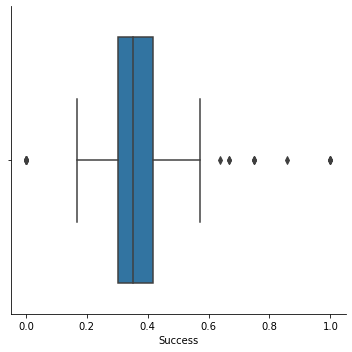

In [212]:
import numpy as np
import pandas as pd
import seaborn as sb

# Comment déterminer la meilleure équipe ?

# 1) Présentation rapide du  volley
# 2) Comment mettre des points des points au volley
# a) Les Attaques

attackers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_attackers.csv');
attackers.rename(columns={"Faults": "FaultsSpike"}, inplace=True)
attackers.rename(columns={"Total attempts": "Total_attempts_spike"}, inplace=True)
attackers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)
attackers["Success"] = attackers["Shots"] / attackers["Total_attempts_spike"]

sb.catplot(x='Success', data=attackers, kind='box')

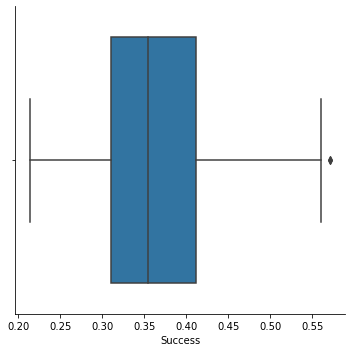

In [234]:
# Beaucoup de valeurs abérantes à cause de ceux qui ne joue pas beaucoup donc on les enlève
sb.catplot(x='Success', data=attackers.query("Success < 0.6 & Success > 0.2"), kind='box')

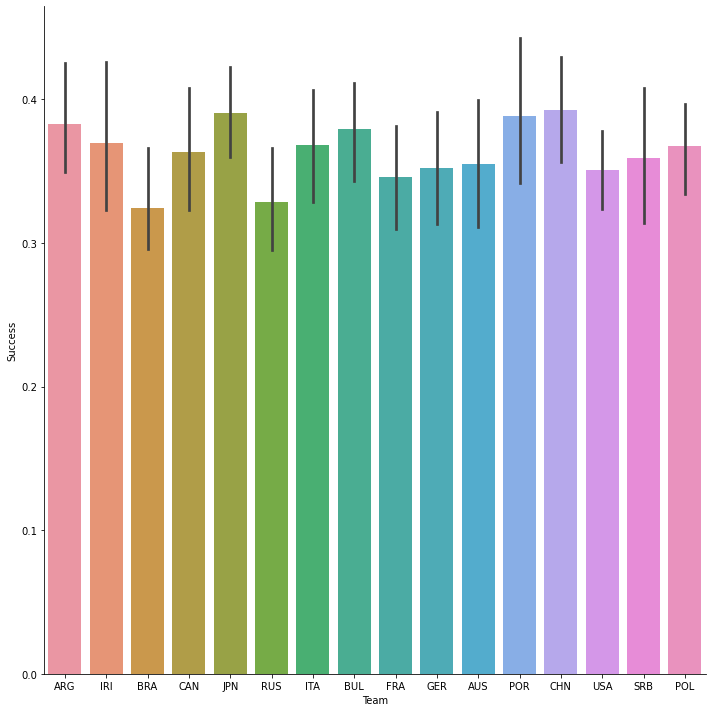

In [235]:
sb.catplot(x="Team", y="Success", data= attackers.query("Success < 0.6 & Success > 0.2"), kind="bar", height=10)

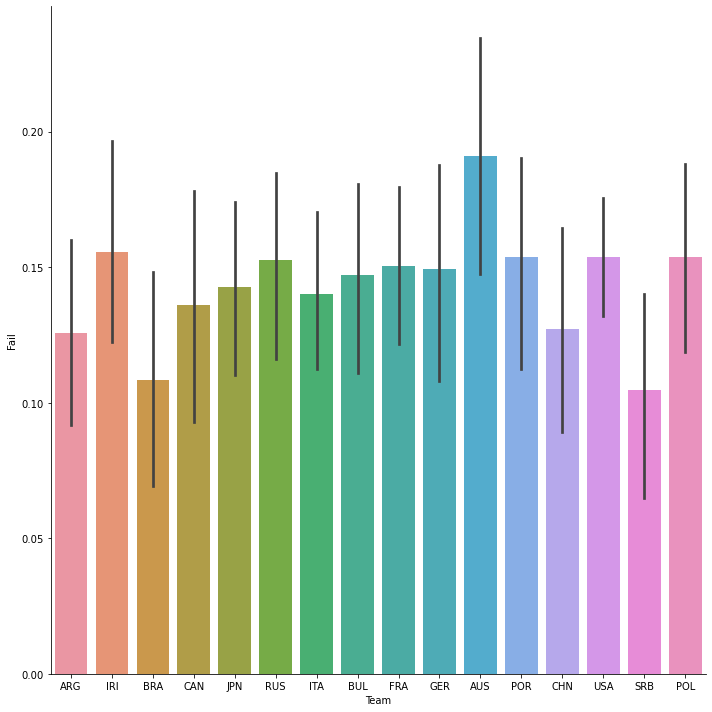

In [237]:
# On peut ce dire que l'équipe qui met le plus de points à l'attaque est celle qui doit gagner
# Mais il faut regarder les fautes directes aussi
attackers["Fail"] = attackers["FaultsSpike"] / attackers["Total_attempts_spike"]
sb.catplot(x="Team", y="Fail", data= attackers.query("Fail < 0.35"), kind="bar", height=10)

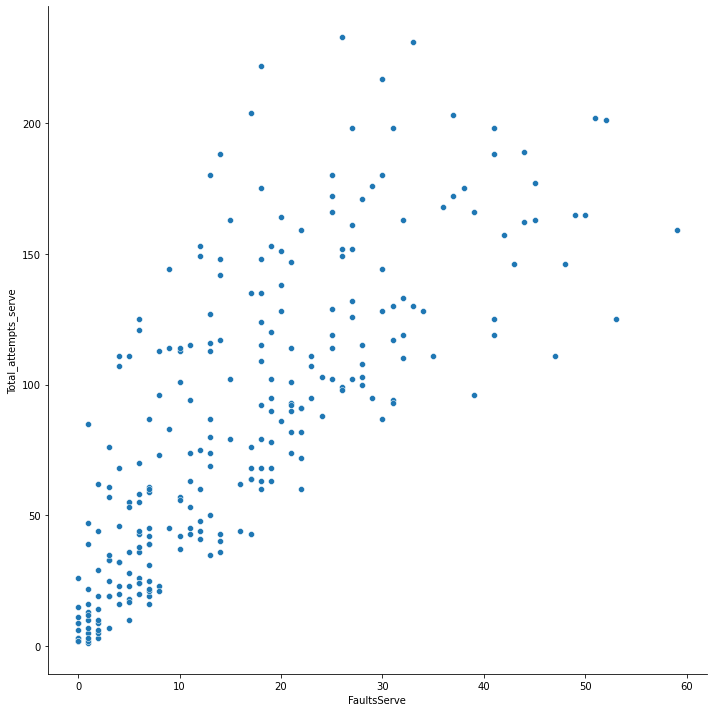

In [265]:
# b) Pareil avec le Service

servers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_servers.csv');
servers.rename(columns={"Faults": "FaultsServe"}, inplace=True)
servers.rename(columns={"Total attempts": "Total_attempts_serve"}, inplace=True)
servers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

servers["Success"] = servers["Aces"] / servers["Total_attempts_serve"]
servers["Fail"] = servers["FaultsServe"] / servers["Total_attempts_serve"]

# Beaucoup de fautes de services
sb.relplot(x="FaultsServe", y="Total_attempts_serve", data=servers, height=10)

In [229]:
scores = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_scores.csv');
scores.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)
scores["Total_Attempts"] = attackers["Total_attempts_spike"] + blockers["Total_attempts_block"] + servers["Total_attempts_serve"]
scores["Total_fault"] = attackers["FaultsSpike"] + blockers["FaultsBlock"] + servers["FaultsServe"]
scores["Result"] = ((scores["Total"] - scores["Total_fault"]) / scores["Total_Attempts"])